In [1]:
# Group Number: 23
# Roll Numbers: 22CD91F01(Nazeer Haider), 20CS10076(Vishal Ravipati), 22CS60R57(Yerragorla Krishna Mohan)
# Project Number: HSNB
# Project Title: Patient's Hospital Stay Prediction using Naive Bayes Classifier Learning Model

#importing required modules
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import naive_bayes 
from math import log


In [2]:
#reading file
df=pd.read_csv('hospital.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [3]:
def handle_missing_values(df):
#finding missing value with inapproriate value for each variable and assigning them to NaN like strings in int variable and vice versa
    count=0
    for row in df["Hospital_code"]:
        if isinstance(row,int):
            pass
        else:
            df.loc[count,'Hospital_code']=np.nan
        count+=1
    count=0
    for row in df["City_Code_Hospital"]:
        if isinstance(row,int):
            pass
        else:
            df.loc[count,'City_Code_Hospital']=np.nan
        count+=1
    count=0
    for row in df["Available Extra Rooms in Hospital"]:
        if isinstance(row,int):
            pass
        else:
            df.loc[count,'Available Extra Rooms in Hospital']=np.nan
        count+=1

    count=0
    for row in df["patientid"]:
        if isinstance(row,int):
            pass
        else:
            df.loc[count,'patientid']=np.nan
        count+=1
    count=0
    for row in df["Stay"]:
        if row!='01-11-2020' or row!='Nov-20':
            pass
        else:
            df.loc[count,'Stay']=np.nan
        count+=1
    count=0
    for row in df["Age"]:
        if row!='01-11-2020' or row!='Nov-20' :
            pass
        else:
            df.loc[count,'Age']=np.nan
        count+=1
    #finding missing value with inapproriate value for each variable and assigning them to NaN like strings in int variable and vice versa
    count=0
    list=[]
    for row in df['Hospital_type_code']:
        '''if row not in list:it is for decoding like how many types in hospital type code
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Hospital_type_code']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Hospital_region_code']:
        '''if row not in list:it is for decoding like how many types in hospital region code
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Hospital_region_code']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Department']:
        '''if row not in list:it is for decoding like how many types in Department
            list.append(row)'''
        
        try:
            int(row)
            df.loc[count,'Department']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Ward_Type']:
        '''if row not in list:it is for decoding like how many types in Ward type
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Ward_Type']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Ward_Facility_Code']:
        '''if row not in list:it is for decoding like how many types in Ward Facility Code
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Ward_Facility_Code']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Type of Admission']:
        '''if row not in list:it is for decoding like how many types in Type of Admission
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Type of Admission']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)
    count=0
    for row in df['Severity of Illness']:
        '''if row not in list:
            list.append(row)'''
        try:
            int(row)
            df.loc[count,'Severity of Illness']=np.nan
        except ValueError:
            pass
        count+=1
    #print(list)

    #here,if we replace with mean or median for bed Grade which is fractional so avoided instead we use mode
    #most frequent occuring value for Bed grade#making bed grade to fractional value looks it bad
    mode1=2
    df['Bed Grade']=df['Bed Grade'].replace(np.NaN,mode1)
    #here,if we replace with mean or median for city_code_patient which is fractional so avoided() instead we use mode
    #most frequent occuring value for Bed grade#making city_code_patient to fractional value looks it bad
    mode2=7
    df['City_Code_Patient']=df['City_Code_Patient'].replace(np.NaN,mode2)
    #print(df.isnull().sum()) #it is used to check that there is how many NaN values in the each variable.if it is zero then simply our
    #missing values handling is over
    return df


In [4]:
def encoding(df):

#df['Age'][318436:318437]
#encoding categorical variables into using simple find and replace
    cleanup_nums = {"Hospital_type_code":     {"a": 1, "b": 2,"c":3,"d":4,"e":5,"f":6,"g":7},
                    "Hospital_region_code": {"X": 1, "Y": 2, "Z": 3 },
                    "Department":     {"radiotherapy": 1, "anesthesia": 2,"gynecology":3,"TB & Chest disease":4,"surgery":5},
                    "Ward_Type":     {"P": 1, "Q": 2,"R":3,"S":4,"T":5,"U":6},
                    "Ward_Facility_Code":     {"A": 1, "B": 2,"C":3,"D":4,"E":5,"F":6},
                    "Type of Admission": {"Emergency": 1, "Trauma": 2, "Urgent":3},
                    "Severity of Illness": {"Extreme": 1, "Moderate": 2, "Minor":3},
                    "Age":     {"0-10": 1, "11-20": 2,"21-30":3,"31-40":4,"41-50":5,"51-60":6,"61-70":7,"71-80":8,"81-90":9,"91-100":10},
                    "Stay":     {"0-10": 1, "11-20": 2,"21-30":3,"31-40":4,"41-50":5,"51-60":6,"61-70":7,"71-80":8,"81-90":9,"91-100":10, "More than 100 Days": 11}
                    
                    
                    
                }
    count=0

    df = df.replace(cleanup_nums)
    return df

In [5]:
def prepare_data_task1(df):
    df = handle_missing_values(df)
    df = encoding(df)
    df['Admission_Deposit'] = pd.cut(df['Admission_Deposit'], bins=5, labels=[1, 2, 3, 4, 5])           # dividing admission deposit into buckets to make it categorical variable
    return df

train_df = prepare_data_task1(train_df)
test_df = prepare_data_task1(test_df)

In [6]:
train_df = train_df.drop(['case_id', 'Hospital_type_code', 'Hospital_region_code', 'Ward_Type', 'patientid'],axis=1)
test_df = test_df.drop(['case_id', 'Hospital_type_code', 'Hospital_region_code', 'Ward_Type', 'patientid'],axis=1)
X_train = train_df.drop(['Stay'], axis=1)
y_train = train_df['Stay']
X_test = test_df.drop(['Stay'], axis=1)
y_test = test_df['Stay']

In [7]:
X_train

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
305797,28,11,2,1,6,4.0,4.0,2,3,2,6,3
139943,14,1,2,3,5,2.0,3.0,1,3,3,2,2
182403,8,3,2,3,6,3.0,4.0,2,3,2,7,2
12118,24,1,3,3,5,4.0,12.0,2,3,3,1,4
66747,28,11,2,2,6,4.0,1.0,1,2,2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
122579,30,3,5,3,1,2.0,19.0,1,2,3,4,2
304137,5,1,3,3,5,3.0,3.0,1,3,3,6,3
152315,31,3,4,3,1,1.0,8.0,2,1,2,5,2
117952,14,1,2,1,5,2.0,8.0,2,2,3,6,3


In [8]:
class myNaiveBayes:

    def __init__(self):
        self.length = 0

    def fit(self, X_train, y_train):                                        # creating a dictionary to store the count of each feature value for each class label
        self.train_dict = {}                                                # each entry is of the form {class_label: {feature_index: {feature_value: count}}}
        dataset = pd.concat([X_train, y_train], axis=1)
        dataset = dataset.values
        for i in range(len(dataset)):
            sample = dataset[i]
            prediction = sample[-1]
            sample = sample[:-1]
            for j in range(len(sample)):
                if prediction not in self.train_dict:
                    self.train_dict[prediction] = {}
                if j not in self.train_dict[prediction]:
                    self.train_dict[prediction][j] = {}
                if sample[j] not in self.train_dict[prediction][j]:
                    self.train_dict[prediction][j][sample[j]] = 0
                self.train_dict[prediction][j][sample[j]] += 1
        self.length = len(dataset)
        

    def predict(self, X_test):                                  
        predictions = []
        X_test = X_test.values.tolist()
        for sample in X_test:
            pred_prob = []
            for prediction in range(1, len(self.train_dict) + 1):
                total_f = sum(self.train_dict[prediction][0].values())    # total number of samples with class label = prediction
                prob = 1;
                for feature in range(0, len(sample)):
                    if sample[feature] not in self.train_dict[prediction][feature]:         # if a feature value is not present in the training data for a class label
                        prob = 0
                        break
                    feature_occurences = self.train_dict[prediction][feature][sample[feature]] / total_f # probability of a feature value given a class label
                    prob_feature_occurence = feature_occurences
                    prob *= prob_feature_occurence
                prob *= total_f / self.length                                               # probability of a class label
                pred_prob.append(prob)
            predictions.append(pred_prob.index(max(pred_prob)) + 1)                         # prediction is the class label with maximum probability
        return predictions


In [9]:
def fiveFold(model, X_train, y_train):
  best_model = None
  # Assume X_train and y_train are the feature and label arrays of the training set
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Initialize an empty list to store the accuracy scores
  accuracy_scores = []

  for train_index, val_index in kf.split(X_train):
      # Train the classifier on the training set
      X_split_train, X_split_val = X_train.iloc[train_index], X_train.iloc[val_index]
      y_split_train, y_split_val = y_train.iloc[train_index], y_train.iloc[val_index]
      model.fit(X_split_train, y_split_train)
      
      # Compute the accuracy on the validation set
      y_pred = model.predict(X_split_val)
      accuracy = accuracy_score(y_split_val, y_pred)
      accuracy_scores.append(accuracy)
      if best_model == None or accuracy > best_model[0]:
          best_model = (accuracy, model)

  # Compute the average accuracy across all folds
  average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
  print("Average accuracy with cross validation: ",average_accuracy)
  return best_model[1]

[0.62397804 0.18673151 0.0789282  0.03087592 0.02561777 0.02249491]


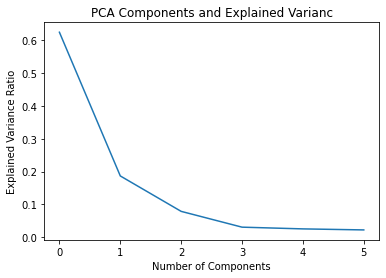

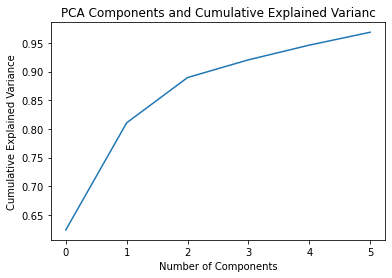

Average accuracy with cross validation:  0.3633523061825319


In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
X_train_pca = X_train.to_numpy()
X_train_pca = (X_train_pca - X_train_pca.mean()) / X_train_pca.std()
# Apply PCA to preserve 95% of the total variance
pca = PCA(n_components=0.95)
pca_features = pca.fit(X_train)
pca_features = pca.transform(X_train)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Components and Explained Varianc')
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components and Cumulative Explained Varianc')
plt.show()

model = myNaiveBayes()
best_model = fiveFold(model, X_train, y_train)

In [11]:
y_prediction = best_model.predict(X_test)
print('Test set accuracy score is ', accuracy_score(y_test, y_prediction))

Test set accuracy score is  0.363899007662354
